In [1]:
# External imports
import pandas as pd
import numpy as np
import random as rd
import matplotlib.pyplot as plt
from pathlib import Path
from scipy import stats


In [11]:
session_ids = [1044385384, 1104052767, 1112302803]

dfs = []

for sid in session_ids:

  path = Path.cwd().parents[1] / 'data' / 'ts_fano_reg' / f'{sid}.csv'
  df = pd.read_csv(path)
  dfs.append(df)

pooled = pd.concat(dfs, axis=0, ignore_index=True)
n_timepoints = pooled["time_point"].nunique()
tps = pooled["time_point"].unique().tolist()



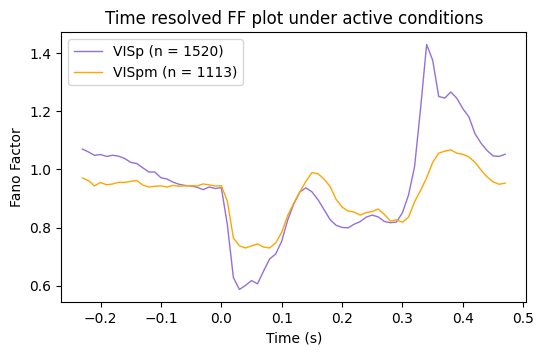

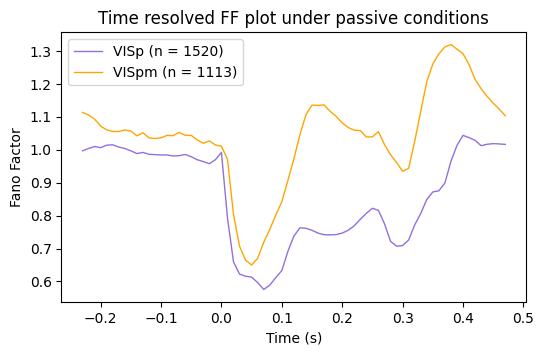

In [ ]:
fano = {}

for (t, a, c), group in pooled.groupby(["time_point", "area", "ap"]):

  
  means = group["mean"].to_list()
  vars_ = group["var"].to_list()
  n_units = len(means)

  slope, intercept, r, p, std_err = stats.linregress(means, vars_)

  fano[(t, a, c)] = {
    "slope": slope,
    "n_units": n_units
    }

sections = ["active", "passive"]
areas_of_interest = ["VISp", "VISpm"]

for s in sections:

  fig, ax = plt.subplots(figsize=(6,3.5))

  for area in areas_of_interest:

    if area == "VISp":
      colour = 'mediumpurple'
    else:
      colour = 'orange'

    vals = [fano[(t, area, s)]["slope"] for t in tps]
    n_units = fano[(0.22, area, s)]["n_units"]

    ax.plot(tps, vals, color=colour, lw=1, label=f"{area} (n = {n_units})")
    ax.set_xlabel("Time (s)")
    ax.set_ylabel("Fano Factor")
    ax.set_title(f"Time resolved FF plot under {s} conditions")
    ax.legend()




